<a href="https://colab.research.google.com/github/shaghin-pc/VETINERY/blob/master/CNN_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense 
from tensorflow.keras import utils as np_utils
from tensorflow import keras

import os 
import sys
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import IPython
import cv2
from six.moves import urllib  

In [2]:
df=pd.read_csv("/content/housepricedata.csv - housepricedata.csv.csv")
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [3]:
#Data to Array Conversion
datasetvalue = df.values
datasetvalue

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [4]:
#dataset splitting
X = datasetvalue[:,0:10] 
Y = datasetvalue[:,10]

In [5]:
#building moddel in commen format
from sklearn import preprocessing
max_min_scaler = preprocessing.MinMaxScaler()
X_scaler = max_min_scaler.fit_transform(X)
X_scaler

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [7]:
#spliting data to train data, test data, validation data
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scaler, Y, test_size=0.2)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
#the training set has 1022 data points while the validation and test set has 219 data points each. The X variables have 10 input features, while the Y variables has one feature to predict.
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1168, 10) (146, 10) (146, 10) (1168,) (146,) (146,)


In [8]:
#Building model
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [9]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [10]:
#model training
histogram = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
37/37 [==============================] - 14s 16ms/step - loss: 0.6920 - accuracy: 0.5288 - val_loss: 0.6862 - val_accuracy: 0.5205
Epoch 2/100
37/37 [==============================] - 0s 2ms/step - loss: 0.6862 - accuracy: 0.5016 - val_loss: 0.6812 - val_accuracy: 0.5137
Epoch 3/100
37/37 [==============================] - 0s 2ms/step - loss: 0.6787 - accuracy: 0.5224 - val_loss: 0.6771 - val_accuracy: 0.5137
Epoch 4/100
37/37 [==============================] - 0s 2ms/step - loss: 0.6770 - accuracy: 0.5027 - val_loss: 0.6729 - val_accuracy: 0.5205
Epoch 5/100
37/37 [==============================] - 0s 2ms/step - loss: 0.6713 - accuracy: 0.5155 - val_loss: 0.6671 - val_accuracy: 0.5479
Epoch 6/100
37/37 [==============================] - 0s 2ms/step - loss: 0.6655 - accuracy: 0.5668 - val_loss: 0.6607 - val_accuracy: 0.6575
Epoch 7/100
37/37 [==============================] - 0s 2ms/step - loss: 0.6617 - accuracy: 0.6434 - val_loss: 0.6553 - val_accuracy: 0.7534
Epoch 8/100

In [11]:
#Accuracy at the Second element.
model.evaluate(X_test, Y_test)[1]

5/5 [==============================] - 0s 3ms/step - loss: 0.2697 - accuracy: 0.8767


0.8767123222351074

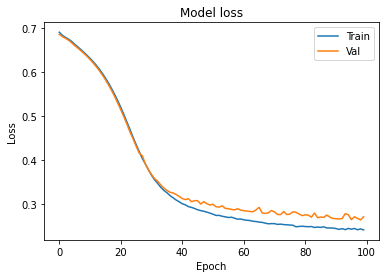

In [12]:
#visualizing the model loss check if model is overfit or not
plt.plot(histogram.history['loss'])
plt.plot(histogram.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

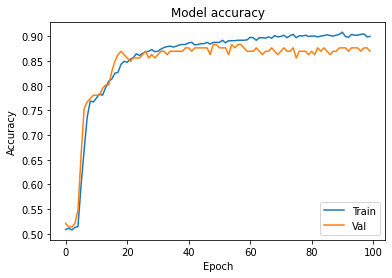

In [13]:
#visualizing training and validation accuracy for check if the model is overfit
plt.plot(histogram.history['accuracy'])
plt.plot(histogram.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()